# Part B: Regression with Default Hyperparameters

In [2]:
import pandas as pd
import numpy as np
from preprocessing import run_pipeline_1, run_pipeline_2
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split


## Exercise 4
What is the simplest baseline model we should aim to beat? Or in other words; if you
would have to make a guess for the salary without knowing anything about the football
player, what would you guess? What is the MAE of such a guess?

In [3]:
# load the data
df = pd.read_csv('../football_wages.csv')
X_processed, y, preprocessor = run_pipeline_2(df)

In [4]:
# the simplest baseline model is the mean of the target variable

y_mean = y.mean()

# the mean absolute error of the baseline model is the sum of the absolute differences between the predicted and actual values
mae_baseline = np.abs(y - y_mean)

print(mae_baseline.mean())



0.49142986701139596


## Exercise 5

Train the KNN and SGD Regressor with default hyperparameters and fairly estimate
their performance for both preprocessing pipelines. Explain why the performance es-
timate is fair and how you estimated the performance.


In [5]:

print("Results for pipeline 1:")
# pipeline 1, KNN Regressor
X_pipeline_1, y_pipeline_1, preprocessor_pipeline_1 = run_pipeline_1(df)
X_train, X_test, y_train, y_test = train_test_split(X_pipeline_1, y_pipeline_1, test_size=0.2, random_state=42)

knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)
mae_knn = np.abs(y_test - y_pred)
print(f'MAE KNN: {mae_knn.mean()}')

# pipeline 1, SGD Regressor
sgd_regressor = SGDRegressor()
sgd_regressor.fit(X_train, y_train)
y_pred = sgd_regressor.predict(X_test)
mae_sgd = np.abs(y_test - y_pred)
print(f'MAE SGD: {mae_sgd.mean()}')

# pipeline 2
X_pipeline_2, y_pipeline_2, preprocessor_pipeline_2 = run_pipeline_2(df)
X_train, X_test, y_train, y_test = train_test_split(X_pipeline_2, y_pipeline_2, test_size=0.2, random_state=42)


print("\nResults for pipeline 2:")
# pipeline 2, KNN Regressor
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)
mae_knn = np.abs(y_test - y_pred)
print(f'MAE KNN: {mae_knn.mean()}')

# pipeline 2, SGD Regressor
sgd_regressor = SGDRegressor()
sgd_regressor.fit(X_train, y_train)
y_pred = sgd_regressor.predict(X_test)
mae_sgd = np.abs(y_test - y_pred)
print(f'MAE SGD: {mae_sgd.mean()}')

Results for pipeline 1:
MAE KNN: 0.2737150948248205
MAE SGD: 0.25635906634482164

Results for pipeline 2:
MAE KNN: 0.280225415740014
MAE SGD: 0.2765375181126227


## Exercise 6
Which pipeline performed the best? Use this pipeline for the next exercises.

### Answer
Pipeline 1 performs better. However in exercise 7 we encounter issues because the nationalities in the autograder test set differ from those in the training set. Therefore we must map the countries to continents to ensure compatibility. Thus we keep using pipeline 2.

## Exercise 7
Submit your your work to the autograder to check your work so far.

In [11]:
# load and preprocess test set
test_set = pd.read_csv('../football_autograder.csv')
X_test, y_test, preprocessor = run_pipeline_2(test_set)
X_pipeline_2, y_pipeline_2, preprocessor_pipeline_2 = run_pipeline_2(df)
X_train = X_pipeline_2
y_train = y_pipeline_2

# fit the KNN and SGD regressors
knn_regressor = KNeighborsRegressor(metric='manhattan', n_neighbors=20, p=1, weights='distance')
knn_regressor.fit(X_train, y_train)

sgd_regressor = SGDRegressor()
sgd_regressor.fit(X_train, y_train)

# predict on test set
knn_pred = knn_regressor.predict(X_test)
SGD_pred = sgd_regressor.predict(X_test)

# save predictions to files
np.savetxt('../autograder_submission_KNN.txt', knn_pred, fmt='%f')
print("Predictions saved to ../autograder_submission_KNN.txt")

np.savetxt('../autograder_submission_SGD.txt', SGD_pred, fmt='%f')
print("Predictions saved to ../autograder_submission_SGD.txt")


Predictions saved to ../autograder_submission_KNN.txt
Predictions saved to ../autograder_submission_SGD.txt


### Results thus far
We ran the autograder for the KNN predictions and got a total score of 24/27 points. For the SGD model we got 25/27 points.

NOTE: I manually copy pasted the MAE of the models we got earlier at the top of the txt file. This is necessary for the autograder to run. 

## Part C: GridSearch

### Exercise 8

For both KNN and SGD regression, use gridsearch to identify the best hyperparame-
ters. Use a systematic way to tune hyperparameters that is reproducible. Explain your
choice of hyperparameter search ranges and settings. Include sufficient details in the
report so that another student can reproduce your experiment.

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# GridSearch for the KNN regressor
param_grid = {
    'n_neighbors': [11, 19, 20, 21, 30],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'p': [1, 2]
}

grid = GridSearchCV(
    KNeighborsRegressor(),
    param_grid,
    scoring='neg_mean_absolute_error',
    cv=5
)

grid.fit(X_train, y_train)
print(grid.best_params_)
print(-grid.best_score_)



{'metric': 'manhattan', 'n_neighbors': 20, 'p': 1, 'weights': 'distance'}
0.26410980938504336


In [8]:
# GridSearch for the SGD regressor
param_grid = {
    # Update 'squared_loss' to 'squared_error'
    'loss': ['squared_error', 'huber', 'epsilon_insensitive'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.00005, 0.0001, 0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300, 400, 500]
}

grid = GridSearchCV(
    SGDRegressor(),
    param_grid,
    scoring='neg_mean_absolute_error',
    cv=5
)

grid.fit(X_train, y_train)
print(grid.best_params_)
print(-grid.best_score_)

{'alpha': 0.01, 'loss': 'epsilon_insensitive', 'max_iter': 300, 'penalty': 'l2'}
0.26740063231937083


### Exercise 9
Include a training curve (performance versus epochs) to illustrate that the SGD regres-
sor converges to a reasonable solution.

/Users/pepijnlens/miniconda3/envs/ml-assignments/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/pepijnlens/miniconda3/envs/ml-assignments/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/pepijnlens/miniconda3/envs/ml-assignments/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/pepijnlens/miniconda3/envs/ml-assignments/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached be

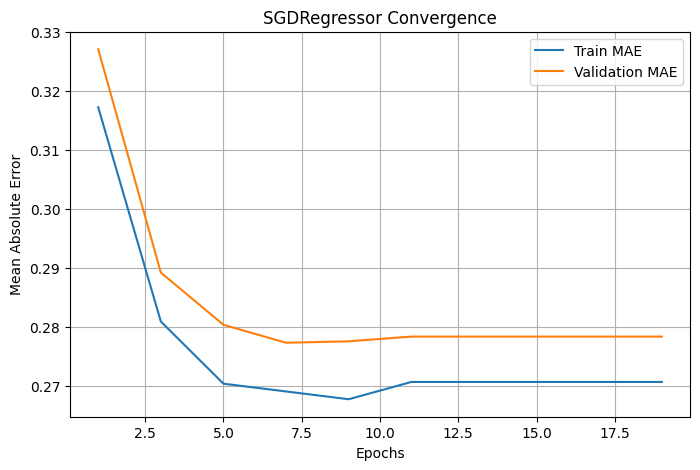

In [10]:
# Include a training curve (performance versus epochs) to illustrate that the SGD regres-
# sor converges to a reasonable solution.

import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

# We'll try different values of max_iter (epochs)
epochs = np.arange(1, 20, 2)
train_errors = []
val_errors = []

# We'll use a validation set for demonstration
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

for n_iter in epochs:
    sgd = SGDRegressor(max_iter=n_iter, tol=1e-3, random_state=0, penalty='l2', alpha=0.0001, loss='squared_error')
    sgd.fit(X_tr, y_tr)
    train_pred = sgd.predict(X_tr)
    val_pred = sgd.predict(X_val)
    # Mean absolute error
    train_mae = mean_absolute_error(y_tr, train_pred)
    val_mae = mean_absolute_error(y_val, val_pred)
    train_errors.append(train_mae)
    val_errors.append(val_mae)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_errors, label='Train MAE')
plt.plot(epochs, val_errors, label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('SGDRegressor Convergence')
plt.legend()
plt.grid(True)
plt.show()


### Exercise 10
Explain why the performance estimate is fair and how you estimated the performance.

### Answer
The plot shows a decreasing trend for both the training and validation MAE as the number of epochs increases, eventually leveling off as the model converges. The validation error stays slightly above the training error, which is expected, but the gap remains small, indicating good generalization and no significant overfitting. This demonstrates that the SGDRegressor is learning effectively and stabilizing to a reasonable solution.


### Exercise 11
Compare the performance of both models before and after hyperparameter tuning.

### Answer
 
Results before hyperparameter tuning:
- MAE KNN: 0.2737150948248205
- MAE SGD: 0.25635906634482164

Results after hyperparameter tuning:
- MAE KNN: 0.26410980938504336
- MAE SGD: 0.26740063231937083

Explanation:
After hyperparameter tuning, the MAE for both KNN and SGDRegressor changed slightly. The KNN model improved its performance, showing a reduction in MAE, while the SGDRegressor's MAE increased a little. This suggests that tuning had a positive effect on KNN, but did not benefit, and may have slightly hurt, SGD in this particular case. Overall, both models achieved similar performance after tuning.